# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=50)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=50)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 40


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
#Set the API Base URL
units = "metric"
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"


    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather['main']["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

     #If an error is experienced, skip the city
    except:
         print("City not found. Skipping...")
         pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bamboo flat
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | enewetak
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | usogorsk
Processing Record 6 of Set 1 | zlatitsa
Processing Record 7 of Set 1 | port mathurin
Processing Record 8 of Set 1 | betul
Processing Record 9 of Set 1 | glace bay
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | vegreville
Processing Record 12 of Set 1 | carbonear
Processing Record 13 of Set 1 | flin flon
Processing Record 14 of Set 1 | fonte boa
Processing Record 15 of Set 1 | takaungu
Processing Record 16 of Set 1 | chernyshevskiy
Processing Record 17 of Set 1 | tazovsky
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | hawaiian paradise park
Processing Record 20 of Set 1 | puerto carreno
Processing Record 21 of Set 1 | lethbridge
Processing Record 22 of Set 1 | port lincoln
Pr

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          39
Lat           39
Lng           39
Max Temp      39
Humidity      39
Cloudiness    39
Wind Speed    39
Country       39
Date          39
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bamboo flat,11.7000,92.7167,26.05,89,100,5.14,IN,1724805335
1,bethel,41.3712,-73.4140,23.28,86,0,0.45,US,1724805116
2,enewetak,11.3474,162.3373,28.74,82,100,9.91,MH,1724805338
3,waitangi,-43.9535,-176.5597,13.23,97,100,4.92,NZ,1724805339
4,usogorsk,63.4106,48.6872,12.42,73,100,2.04,RU,1724805340


In [7]:
# Create the output_data directory if it doesn't exist
os.makedirs("output_data", exist_ok=True)

In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bamboo flat,11.7000,92.7167,26.05,89,100,5.14,IN,1724805335
1,bethel,41.3712,-73.4140,23.28,86,0,0.45,US,1724805116
2,enewetak,11.3474,162.3373,28.74,82,100,9.91,MH,1724805338
3,waitangi,-43.9535,-176.5597,13.23,97,100,4.92,NZ,1724805339
4,usogorsk,63.4106,48.6872,12.42,73,100,2.04,RU,1724805340


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

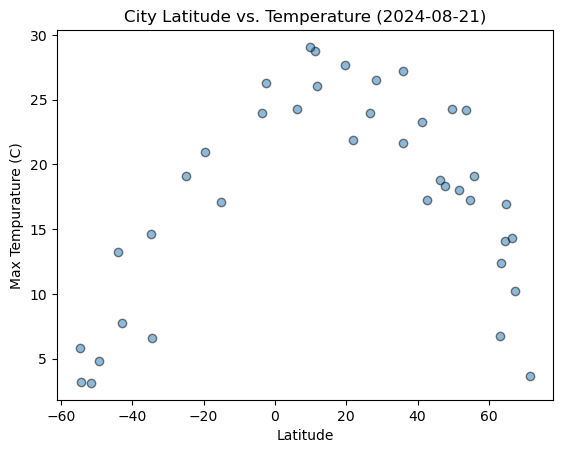

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter (
    x = city_data_df['Lat'],
    y = city_data_df['Max Temp'],
    edgecolor = "black",
    alpha=0.5
)
# Incorporate the other graph properties
plt.title('City Latitude vs. Temperature (2024-08-21)')
plt.xlabel("Latitude")
plt.ylabel('Max Tempurature (C)')
plt.grid = True
# Save the figure
plt.savefig("output_data/Fig1.png")
# Show plot
plt.show()

#### Latitude Vs. Humidity

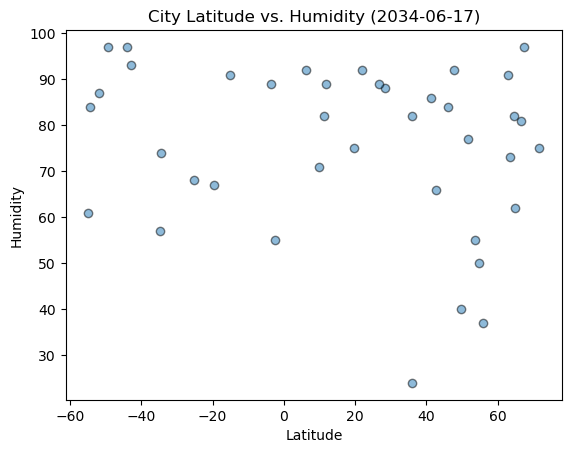

In [11]:
# Build scatter plot for latitude vs. Humidity
plt.scatter (
x = city_data_df['Lat'],
y = city_data_df['Humidity'],
edgecolor = "black",
alpha=0.5
)
# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2034-06-17)')
plt.xlabel("Latitude")
plt.ylabel('Humidity')
plt.grid = True
# Save the figure
plt.savefig("output_data/Fig1.png")
# Show plot
plt.show()

#### Latitude Vs. Cloudiness

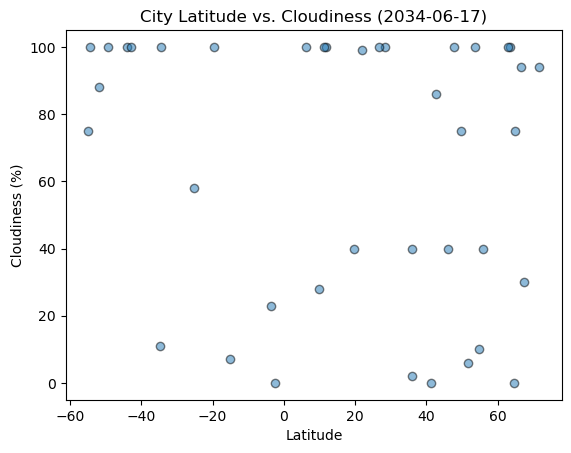

In [12]:
# Build scatter plot for city latitude vs. cloudiness
plt.scatter (
x = city_data_df['Lat'],
y = city_data_df['Cloudiness'],
edgecolor = "black",
alpha=0.5
)
# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2034-06-17)')
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')
plt.grid = True
# Save the figure
plt.savefig("output_data/Fig1.png")
# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

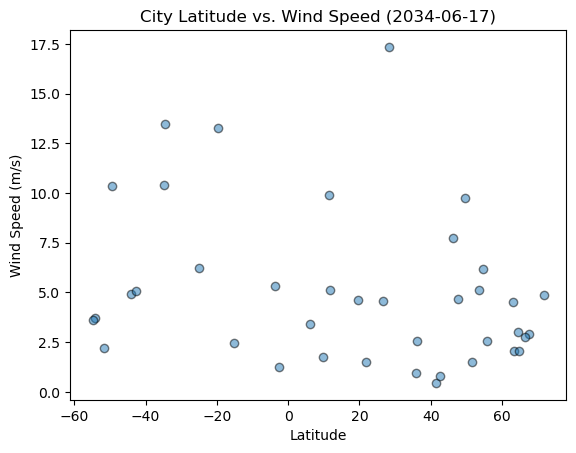

In [13]:
# Build scatter plot for city latitude vs. wind speed plot
plt.scatter (
x = city_data_df['Lat'],
y = city_data_df['Wind Speed'],
edgecolor = "black",
alpha=0.5
)
# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2034-06-17)')
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (m/s)')
plt.grid = True
# Save the figure
plt.savefig("output_data/Fig1.png")
# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def build_my_plots(df, weather_variable):
    x_values = df['Lat']
    y_values = df[weather_variable]

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(min(x_values),min(y_values)),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(weather_variable)
    print(f"The r-sqaure is: {rvalue**2}")
    plt.show()

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>0, :]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bamboo flat,11.7000,92.7167,26.05,89,100,5.14,IN,1724805335
1,bethel,41.3712,-73.4140,23.28,86,0,0.45,US,1724805116
2,enewetak,11.3474,162.3373,28.74,82,100,9.91,MH,1724805338
4,usogorsk,63.4106,48.6872,12.42,73,100,2.04,RU,1724805340
5,zlatitsa,42.7167,24.1333,17.22,66,86,0.79,BG,1724805342


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,waitangi,-43.9535,-176.5597,13.23,97,100,4.92,NZ,1724805339
6,port mathurin,-19.6833,63.4167,20.95,67,100,13.27,MU,1724805343
9,adamstown,-25.0660,-130.1015,19.14,68,58,6.22,PN,1724805347
13,fonte boa,-2.4959,-66.2662,26.29,55,0,1.27,BR,1724805352
14,takaungu,-3.6837,39.8566,24.01,89,23,5.30,KE,1724805353


###  Temperature vs. Latitude Linear Regression Plot

The r-sqaure is: 0.6854508085003002


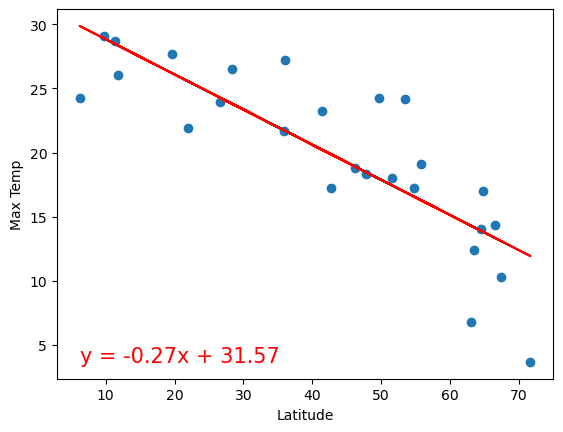

In [17]:
# Linear regression on Northern Hemisphere
build_my_plots(northern_hemi_df, 'Max Temp')

The r-sqaure is: 0.8735063466625091


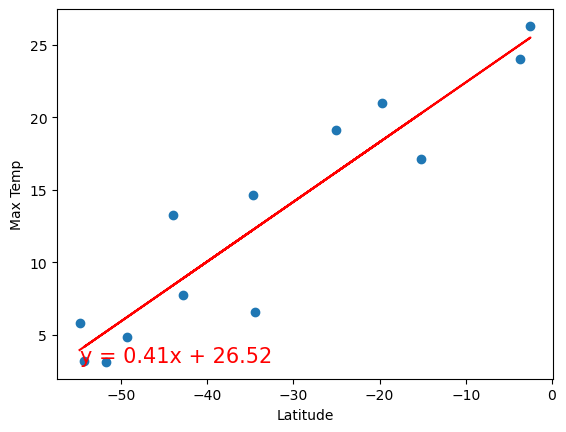

In [18]:
# Linear regression on Southern Hemisphere
build_my_plots(southern_hemi_df, 'Max Temp')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-sqaure is: 0.03877362540625287


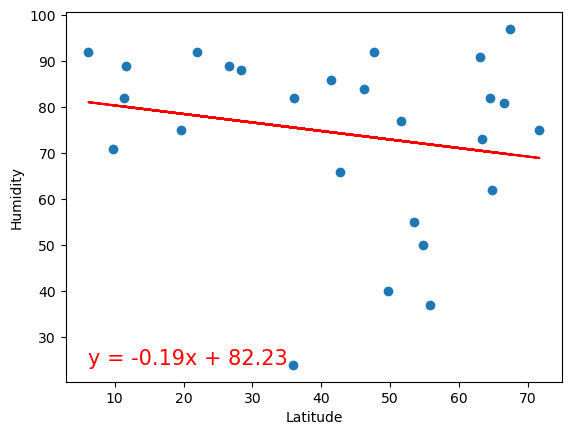

In [19]:
# Northern Hemisphere
build_my_plots(northern_hemi_df, 'Humidity')

The r-sqaure is: 0.07243942465855056


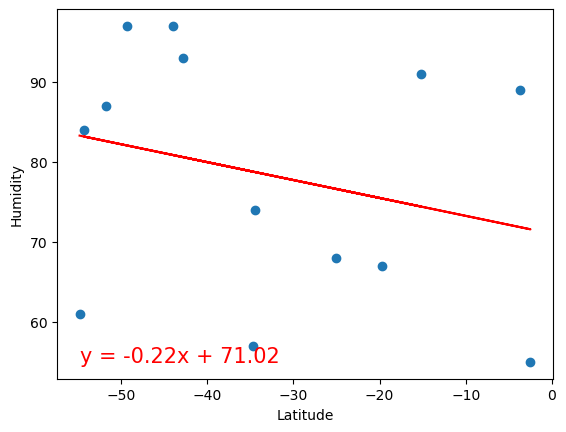

In [20]:
# Southern Hemisphere
build_my_plots(southern_hemi_df, 'Humidity')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-sqaure is: 0.020090767790721793


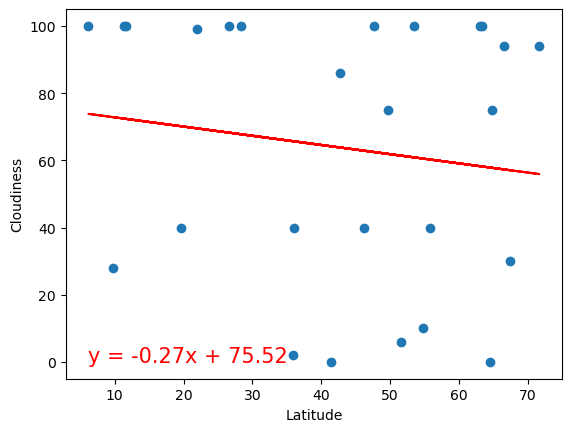

In [21]:
# Northern Hemisphere
build_my_plots(northern_hemi_df, 'Cloudiness')

The r-sqaure is: 0.5034514763133118


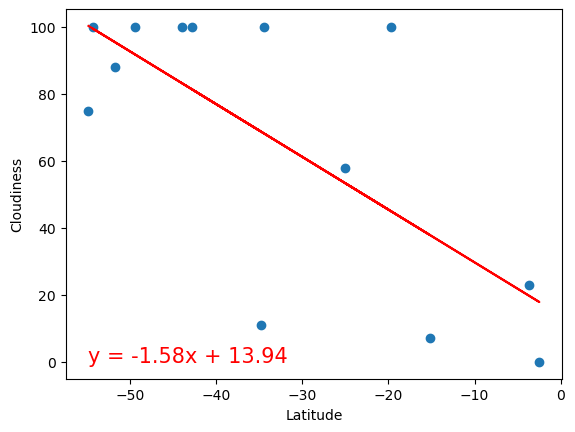

In [22]:
# Southern Hemisphere
build_my_plots(southern_hemi_df, 'Cloudiness')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-sqaure is: 0.030598292168199693


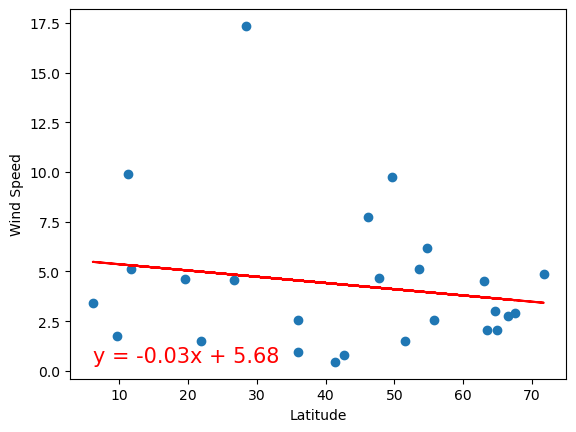

In [23]:
# Northern Hemisphere
build_my_plots(northern_hemi_df, 'Wind Speed')

The r-sqaure is: 0.0007189352631372666


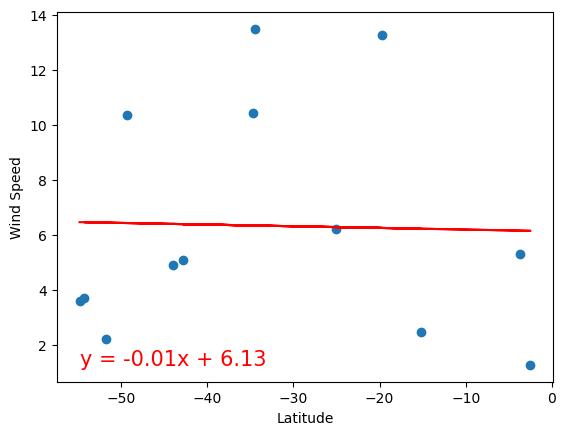

In [24]:
# Southern Hemisphere
build_my_plots(southern_hemi_df, 'Wind Speed')

**Discussion about the linear relationship:** YOUR RESPONSE HERE